In [1]:
import pandas as pd
df=pd.read_csv('/content/gender_submission.csv')
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [2]:
df.isnull().sum()

,0
PassengerId,0
Survived,0


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in df.select_dtypes(include='object').columns:
  data[col]=encoder.fit_transform(data[col])

In [5]:
import numpy as np
x=df.iloc[:,0]
y=df.iloc[:,1]
x

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [8]:
x=np.array(x)
y=np.array(y)
x

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [9]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)
x

array([[ 892],
       [ 893],
       [ 894],
       [ 895],
       [ 896],
       [ 897],
       [ 898],
       [ 899],
       [ 900],
       [ 901],
       [ 902],
       [ 903],
       [ 904],
       [ 905],
       [ 906],
       [ 907],
       [ 908],
       [ 909],
       [ 910],
       [ 911],
       [ 912],
       [ 913],
       [ 914],
       [ 915],
       [ 916],
       [ 917],
       [ 918],
       [ 919],
       [ 920],
       [ 921],
       [ 922],
       [ 923],
       [ 924],
       [ 925],
       [ 926],
       [ 927],
       [ 928],
       [ 929],
       [ 930],
       [ 931],
       [ 932],
       [ 933],
       [ 934],
       [ 935],
       [ 936],
       [ 937],
       [ 938],
       [ 939],
       [ 940],
       [ 941],
       [ 942],
       [ 943],
       [ 944],
       [ 945],
       [ 946],
       [ 947],
       [ 948],
       [ 949],
       [ 950],
       [ 951],
       [ 952],
       [ 953],
       [ 954],
       [ 955],
       [ 956],
       [ 957],
       [ 9

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced')
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

In [20]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.5238095238095238


In [22]:
from sklearn.metrics import  confusion_matrix
cm=confusion_matrix(y_test,y_pred,labels=[1,0])
print("Confusion Matrix:")
print("TP   FP")
print("FN   TN")
print(cm)

Confusion Matrix:
TP   FP
FN   TN
[[18 16]
 [24 26]]


In [23]:
precision=precision_score(y_test,y_pred,zero_division=0)
print("Precision:",precision)

Precision: 0.42857142857142855


In [24]:
recall=recall_score(y_test,y_pred,zero_division=0)
print("Recall:",recall)

Recall: 0.5294117647058824


In [25]:
f1=f1_score(y_test,y_pred,zero_division=0)
print("F1 Score:",f1)

F1 Score: 0.47368421052631576


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(y_test,y_pred,labels=[1,0])

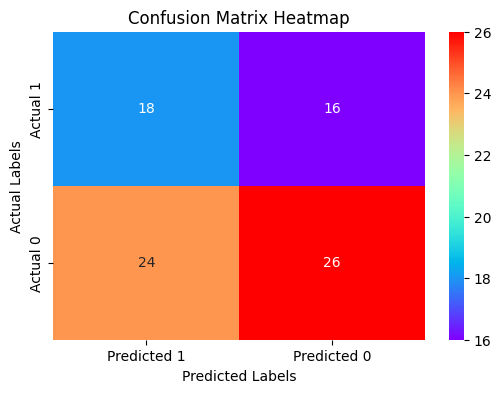

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='rainbow',xticklabels=['Predicted 1','Predicted 0'],yticklabels=['Actual 1','Actual 0'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [28]:
from sklearn.metrics import roc_curve,auc
y_prob=model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob)

In [29]:
roc_auc=auc(fpr,tpr)
print("AUC:",roc_auc)

AUC: 0.5229411764705882


[]

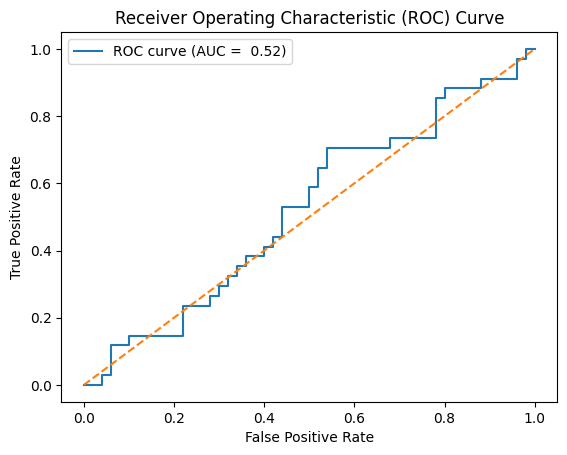

In [32]:
plt.figure()
plt.plot(fpr,tpr,label='ROC curve (AUC =  {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.plot()